# Example of How to Allocate Written Question Tagging

Written Questions are tagged by several indexers in the Parliamentary library on a daily basis, tagging Written Questions tabled the day before. On any given day, each indexer will typically be responsible for tagging all the questions directed at a particular answering body.

The following script shows how work can be fairly allocated to particular individuals based on the number of questions sent to each answering body.

The allocation also allows particular answering bodies to be allocated to a specific individual, or to be kept away from a particular individual.

User input is required in two places:

- specifying the day or period questions to be allocated correspond to; (this can be set as a default - eg *yesterday*);
- specifying the people available and any requirements on who must or must not tag questions for particular answering bodies.

## Supporting Code Area ...  NO NEED TO READ THIS

In [1]:
#Code for loading data in from a URL
import requests

#Get data from URL
def getURL(url,quiet=False):
    if not quiet: print(url)
    r=requests.get(url)
    if not quiet: print(r.status_code)
    return r

#Should build a proper recursive loader
def loader(url,quiet=True):
    items=[]
    done=False
    r=getURL(url,quiet)
    while not done:
        items=items+r.json()['result']['items']
        if 'next' in r.json()['result']:
            r=getURL(r.json()['result']['next']+'&_pageSize=500',quiet)
        else: done=True
    return items

In [2]:
#A tabluar data analysis package that can make life easier...
import pandas as pd

#Support for inline charts
%matplotlib inline

#
from matplotlib import pyplot as plt

#Support for prettier chart styling
import seaborn as sns

#Charts have stylefiles - like HTML has CSS stylesheets
sns.set_style("whitegrid")

In [3]:
#Utilities for expressing natural time
import datetime
from dateutil.relativedelta import relativedelta

def today(date=None,iso=False):
    if date is None: date=datetime.date.today()
    if iso: return date.isoformat()
    else: return date

def yesterday(date=None,iso=False):
    if date is None: date=today()
    yesterday = date.today() - relativedelta(days=1)
    if iso: return yesterday.isoformat()
    return yesterday

def tomorrow(date=None,iso=False):
    if date is None: date=today()
    tomorrow=date.today() + relativedelta(days=1)
    if iso: return tomorrow.isoformat()
    return tomorrow

def last_week(date=None,daterange=True,iso=False):
    if date is None: date=today()
    start_date = date + relativedelta(days=-date.weekday(), weeks=-1)
    end_date = start_date + relativedelta(days=6)
    if daterange:
        if iso: return start_date.isoformat(),end_date.isoformat()
        else: return start_date, end_date

def this_week(date=None,daterange=True,iso=False):
    if date is None: date=today()
    start_date = date + relativedelta(days=-date.weekday())
    end_date = start_date + relativedelta(days=6)
    if daterange:
        if iso:
            return start_date.isoformat(), end_date.isoformat()
        else:
            return start_date, end_date
    
def next_week(date=None,daterange=True,iso=False):
    if date is None: date=today()
    start_date = date + relativedelta(days=-date.weekday(), weeks=1)
    end_date = start_date + relativedelta(days=6)
    if daterange:
        if iso:
            return start_date.isoformat(), end_date.isoformat()
        else:
            return start_date, end_date

def later_this_week(date=None,incl=False,daterange=True,iso=False):
    date=today(date)
    start_date, end_date = this_week(date)
    if not incl: start_date=tomorrow(date)
    else: start_date=today(date)
    #Really need to check if today is last day of week?
    if daterange:
        if iso:
            return start_date.isoformat(), end_date.isoformat()
        else:
            return start_date, end_date
        
def earlier_this_week(date=None,incl=False,daterange=True,iso=False):
    date=today(date)
    start_date, end_date = this_week(date)
    if not incl: end_date=yesterday(date)
    else: end_date=today(date)
    #Really need to check if today is first day of week?
    if daterange:
        if iso:
            return start_date.isoformat(), end_date.isoformat()
        else:
            return start_date, end_date
    
def last_month(date=None,daterange=True,iso=False):
    if date is None: date=today()
    end_date = date.replace(day=1)- relativedelta(days=1)
    start_date = end_date.replace(day=1)
    if daterange:
        if iso: return start_date.isoformat(),end_date.isoformat()
        else: return start_date, end_date

def next_month(date=None,daterange=True,iso=False):
    if date is None: date=today()
    end_date = date+ relativedelta(months=2)
    end_date=end_date.replace(day=1)- relativedelta(days=1)
    start_date = end_date.replace(day=1)
    if daterange:
        if iso: return start_date.isoformat(),end_date.isoformat()
        else: return start_date, end_date

def this_month(date=None,daterange=True,iso=False):
    if date is None: date=today()
    end_date = next_month(date)[0]- relativedelta(days=1)
    start_date = end_date.replace(day=1)
    if daterange:
        if iso: return start_date.isoformat(),end_date.isoformat()
        else: return start_date, end_date

def earlier_this_month(date=None,incl=False,daterange=True,iso=False):
    if date is None: date=today()
    start_date, end_date = this_month(date)
    if not incl: end_date=yesterday(date)
    else: end_date=today(date)
    #Really need to check if today is first day of month?
    if daterange:
        if iso:
            return start_date.isoformat(), end_date.isoformat()
        else:
            return start_date, end_date
    
def later_this_month(date=None,incl=False,daterange=True,iso=False):
    if date is None: date=today()
    start_date, end_date = this_month(date)
    if not incl: start_date=tomorrow(date)
    else: start_date=today(date)
    #Really need to check if today is last day of month?
    if daterange:
        if iso:
            return start_date.isoformat(), end_date.isoformat()
        else:
            return start_date, end_date   

#via http://stackoverflow.com/a/2384407/454773
MON, TUE, WED, THU, FRI, SAT, SUN = range(7)
def day_lastweek(day=MON,date=None,iso=False):
    if date is None: date=today()
    qday= last_week()[0] + relativedelta(days=day)
    if iso: return qday.isoformat()
    return qday

def day_thisweek(day=MON,date=None,iso=False):
    if date is None: date=today()
    qday= this_week()[0] + relativedelta(days=day)
    if iso: return qday.isoformat()
    return qday

def day_nextweek(day=MON,date=None,iso=False):
    if date is None: date=today()
    qday= next_week()[0] + relativedelta(days=day)
    if iso: return qday.isoformat()
    return qday

In [4]:
#Example of using the date functions
print('''
last_week(iso=True):\t{}
last_week(iso=True)[0]:\t{}
yesterday(iso=True):\t{}
'''.format(last_week(iso=True), last_week(iso=True)[0], yesterday(iso=True)))


last_week(iso=True):	('2017-03-20', '2017-03-26')
last_week(iso=True)[0]:	2017-03-20
yesterday(iso=True):	2017-03-26



## Identifying the Period You Want to Tag Questions For

Department allocation will be based on questions asked on a particular day or since a particular date (and inclusive of that date. (We could also generalise to a period - particular week or month or Parliamentary session.)

In [5]:
PERIOD = last_week(iso=True)[0] #Last week returns the date of the first day (Monday) and last day (Sunday); pick the first
#PERIOD = yesterday(iso=True)

#If today is Monday, we maybe need a "last working day" or "since last working day".
#One heuristic may be - if today is not Monday, use yesterday, else use last Friday
#PERIOD= yesterday(iso=True) if today().strftime('%a')!='Mon' else day_lastweek(day=FRI,iso=True)


#If SINCE is True, lookup questions since that date and inclusive of it
#If SINCE is False, only lookup questions on that date
SINCE=True

## Generate the API URL and Load the Data

In [6]:
#Quick peek at the API

#http://lda.data.parliament.uk/commonswrittenquestions.json?_view=Written+Questions&_pageSize=10&_page=0
stub='http://lda.data.parliament.uk'.strip('/')

if SINCE:
    url='{}/{}.json?{}'.format(stub,'commonswrittenquestions','min-dateTabled={}'.format(PERIOD))
else:
    url='{}/{}.json?dateTabled={}'.format(stub,'commonswrittenquestions',PERIOD)

#The API returns a list of written questions on/since the specified date
items=loader(url)

## Count by Answering Body

We can now work through the answers and identify the answering body associated with each.

In [7]:
def getAnsweringBody(item):
    rel=[]
    for body in item['AnsweringBody']:
        rel.append(body['_value'])
    return rel

In [8]:
#Structurally in the API data, it may be the case that a question is directed at several Answering Bodies.
#We could treat these as multiple separate requests requiring tagging, once for each body:
#rels=[rel for s in [getAnsweringBody(q) for q in items] for rel in s]

#Or by default we just go with the first named body
rels=[rel for s in [getAnsweringBody(q) for q in items] for rel in s]

#Also flag where there were multiple bodies?
#multibody=[m for m in [getAnsweringBody(q)  for q in items] if len(m)>1]
#if multibody: print("Some requests appear to be targeted at multiple bodies:", m)

#Display the answering body for the first few questions
df=pd.DataFrame(rels)
df.columns=['Answering Body']
df.head(10)

,Answering Body
0,Attorney General
1,Cabinet Office
2,HM Treasury
3,HM Treasury
4,HM Treasury
5,HM Treasury
6,Department for Communities and Local Government
7,Department for Communities and Local Government
8,Department for Communities and Local Government
9,Department for Communities and Local Government


We want to count the number of question referred to each answering body and allocate on that basis.

In [9]:
dfc=df.groupby('Answering Body').size().rename('Count').reset_index().sort_values('Count',ascending=False)
dfc.head()

,Answering Body,Count
18,Ministry of Defence,25
19,Ministry of Justice,21
13,Department of Health,21
6,Department for Education,19
4,Department for Communities and Local Government,15


In [10]:
#This is a bit of utility code that helps us count how work is allocated
#https://github.com/timdiels/chicken_turtle_util/blob/master/chicken_turtle_util/algorithms.py
class _handler(object):
    def __init__(self,_name):
        self._name = _name
        self._items = []
        self._itemCounts = []
        self._count_sum = 0
        
    def add(self, item, count):
        self._items.append(item)
        self._itemCounts.append((item,count))
        self._count_sum += count
    
    @property
    def name(self):
        return self._name
    
    @property
    def items(self):
        return (self._items, self._count_sum)
    
    @property
    def itemCounts(self):
        return (self._itemCounts, self._count_sum)
    
    @property
    def count_sum(self):
        return self._count_sum

### YOUR TURN...

Who's doing the work? Are there any preferences?

In [11]:
#List of names of folk doing the work
handlers=['Ann','Brian','Claire','David']

#Are there any requirements as to whom particular targeted answering bodies will specifically be allocated to?
handlerPrefs={'Ann':['Department of Health','Attorney General'],
              'David':['Ministry of Defence']}
#We should perhaps also check that there are no collisions in prefs
#For example, if two or more people have the same pref, randomly pick who will get it?


#Are there any requirements as to which particular targeted answering bodies must not be allocated to a particular person?
handlerAvoid={'Brian':['HM Treasury']}
##We should probably check that a body is not completely avoided... i.e. at least one person exists to handle it

## From here on in, it's the machine...

Allocate heuristically - sort from largest job to lowest; give next job to person with least load overall.

If there are only a few questions in total, may want to allocate to a single person?

In [12]:
#This bit of code handles the allocation
handlerJobs=[_handler(h) for h in handlers]
handled=[]

#First of all, allocate according the preferences (actually, we treat these as *required* allocations)
for handler_ in handlerJobs: 
    if handler_.name in handlerPrefs:
        for ix,row in dfc[dfc['Answering Body'].isin(handlerPrefs[handler_.name])].iterrows():
            #Add a start to an answering body name of the allocation was required
            handler_.add(row['Answering Body']+'*',row['Count'])
            handled.append(row['Answering Body'])

#Allocating the work is an example of a multi-way partition problem.
#This sort of problem can be quite hard to solve exactly, but there are heuristics
#Eg allocate from largest job to lowest; give next job to person with least load overall
for ix,row in dfc[~dfc['Answering Body'].isin(handled)].iterrows():
    #Note the 'if not' tweak to the allocation so someone who wants to avoid an answering body actually does so...
    handler_ = min(handlerJobs, key=lambda handler_: handler_._count_sum if not (handler_.name in handlerAvoid and row['Answering Body'] in handlerAvoid[handler_.name])  else float('inf')  ) 
    handler_.add(row['Answering Body'],row['Count'])
    

In [13]:
#Quick look at the results
for h in handlerJobs:
    print(h.name, h.itemCounts[1],h.itemCounts[0],'\n')                   

Ann 56 [('Department of Health*', 21), ('Attorney General*', 1), ('Department for International Trade', 15), ('Department for Transport', 9), ('Foreign and Commonwealth Office', 8), ('Leader of the House', 1), ('Northern Ireland Office', 1)] 

Brian 56 [('Ministry of Justice', 21), ('Department for Environment, Food and Rural Affairs', 15), ('Department for Business, Energy and Industrial Strategy', 12), ('Women and Equalities', 4), ('Department for International Development', 3), ('Scotland Office', 1)] 

Claire 55 [('Department for Education', 19), ('Department for Communities and Local Government', 15), ('Home Office', 13), ('Department for Work and Pensions', 5), ('Department for Exiting the European Union', 3)] 

David 55 [('Ministry of Defence*', 25), ('HM Treasury', 14), ('Department for Culture, Media and Sport', 8), ('Cabinet Office', 5), ('Wales Office', 2), ('Church Commissioners', 1)] 



In [14]:
#Or more prettily...
for h in handlerJobs:
    abtxt=''.join(['\n\t- {} for the {}'.format(b[1], b[0]) for b in h.itemCounts[0]])
    print('----\n{} needs to tag {} questions:{}'.format(h.name, h.itemCounts[1],abtxt))

----
Ann needs to answer 56 questions:
	- 21 for the Department of Health*
	- 1 for the Attorney General*
	- 15 for the Department for International Trade
	- 9 for the Department for Transport
	- 8 for the Foreign and Commonwealth Office
	- 1 for the Leader of the House
	- 1 for the Northern Ireland Office
----
Brian needs to answer 56 questions:
	- 21 for the Ministry of Justice
	- 15 for the Department for Environment, Food and Rural Affairs
	- 12 for the Department for Business, Energy and Industrial Strategy
	- 4 for the Women and Equalities
	- 3 for the Department for International Development
	- 1 for the Scotland Office
----
Claire needs to answer 55 questions:
	- 19 for the Department for Education
	- 15 for the Department for Communities and Local Government
	- 13 for the Home Office
	- 5 for the Department for Work and Pensions
	- 3 for the Department for Exiting the European Union
----
David needs to answer 55 questions:
	- 25 for the Ministry of Defence*
	- 14 for the HM Tr

## General Reports

A set of general reports. These grab data from the API and then start to display reports off the back of the data.

### Session to date

Reports for the current session to date (we could probably automate the disocveru of the session text).

We could also do things like:

- last calendar month
- this month to date
- last week
- this week to date

In [15]:
url='{}/{}.json?session={}'.format(stub,'commonswrittenquestions','2016/17')
items=loader(url)

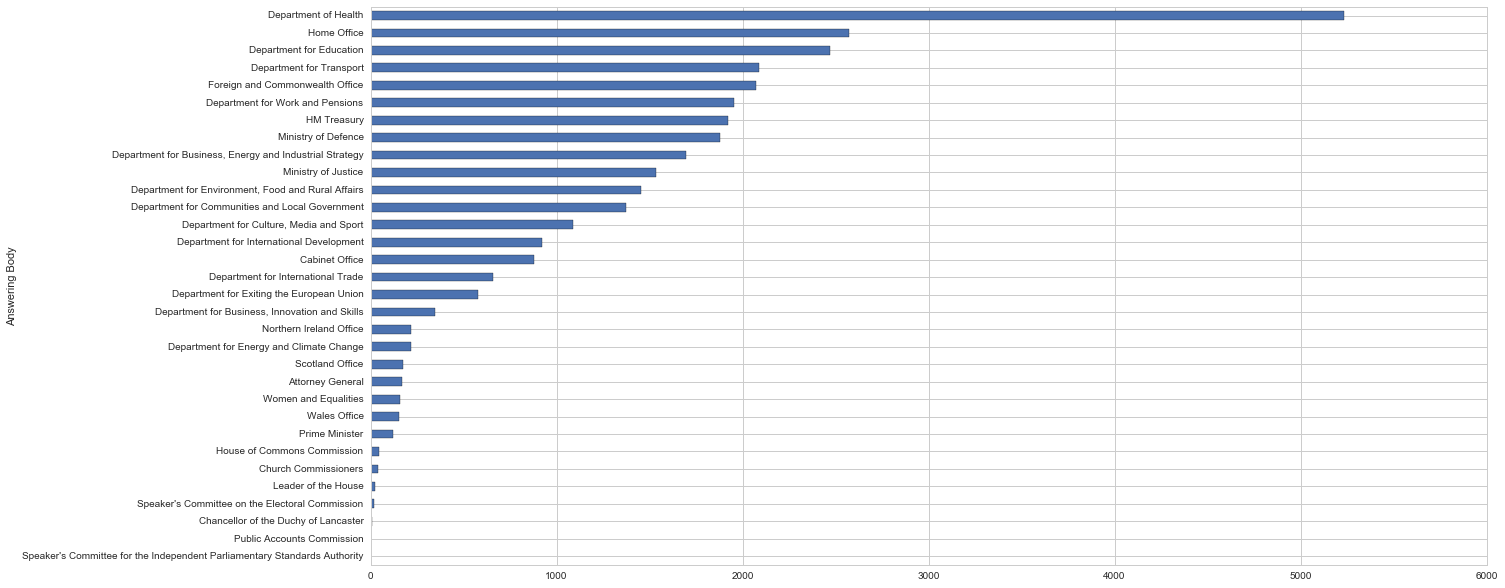

In [16]:
rels=[rel for s in [getAnsweringBody(q) for q in items] for rel in s]

df=pd.DataFrame(rels)
df.columns=['Answering Body']
g=df.groupby('Answering Body').size().rename('Count').sort_values(ascending=True).plot(kind='barh', figsize=(20,10));

### Last Week

Example of report for last week.

In [17]:
PERIOD_START,PERIOD_END=last_week(iso=True)
url='{}/{}.json?{}'.format(stub,'commonswrittenquestions','min-dateTabled={}&max-dateTabled={}'.format(PERIOD_START,PERIOD_END))
items=loader(url,quiet=False)

http://lda.data.parliament.uk/commonswrittenquestions.json?min-dateTabled=2017-03-20&max-dateTabled=2017-03-26
200
http://lda.data.parliament.uk/commonswrittenquestions.json?max-dateTabled=2017-03-26&_page=1&min-dateTabled=2017-03-20&_pageSize=500
200


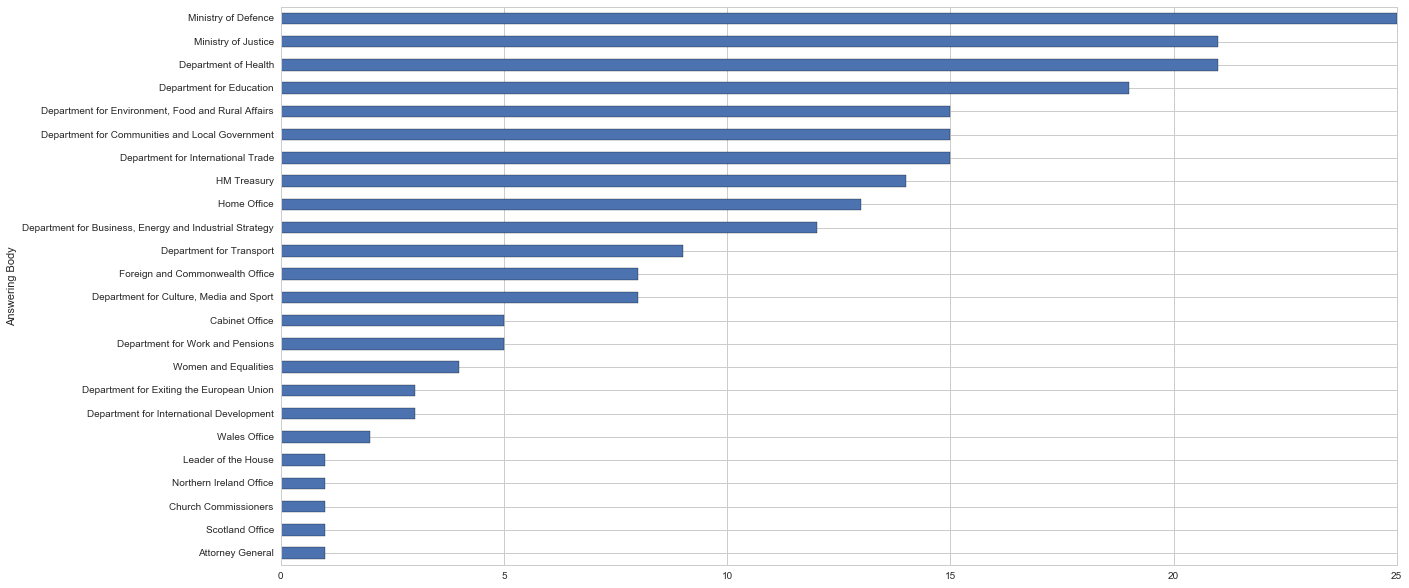

In [18]:
rels=[rel for s in [getAnsweringBody(q) for q in items] for rel in s]

df=pd.DataFrame(rels)
df.columns=['Answering Body']
g=df.groupby('Answering Body').size().rename('Count').sort_values(ascending=True).plot(kind='barh', figsize=(20,10));